## Logistic Regression

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize
%matplotlib notebook

In [3]:
df = pd.read_csv('./ex2/ex2data1.txt')

In [4]:
df.columns = ['Exam1', 'Exam2', 'Admittance']

Text(0, 0.5, 'Exam 2 Score')

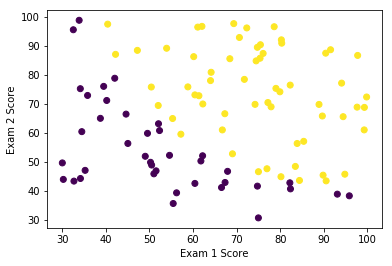

In [5]:
plt.figure()
plt.scatter(df['Exam1'], df['Exam2'], c=df['Admittance'], label=['Not Admitted', 'Admitted'])
plt.xlabel('Exam 1 Score')
plt.ylabel('Exam 2 Score')

### Cost function and gradient

In [6]:
epsilon = 1e-5

In [7]:
def sigmoid(z):
    return 1 /(1 + np.exp(-z))

In [8]:
def h(theta, X):
    h_x = np.array(theta @ X.T)
    return sigmoid(h_x)

In [9]:
def cost_function(X, y, theta):
    h_x = h(theta, X)
    m = len(X)
    pos = y * np.log(h_x + epsilon)
    neg = (1-y) * np.log(1-h_x + epsilon)
    error = pos + neg
    cost = np.average(-error)
    return cost

In [10]:
def dJ(X, y, theta):
    m = len(X)
    h_x = h(theta, X)
    error = (h_x - y) * X
    return np.average(error)

In [11]:
X = df.drop('Admittance', axis = 1); y = df['Admittance'][None, :];

In [12]:
m = X.shape[0]; X['x0'] = np.ones((m, 1)); 

In [13]:
X = X[['x0', 'Exam1', 'Exam2']];

In [14]:
theta = np.zeros((1, X.shape[1])); 

In [15]:
J = cost_function(X, y, theta); J.round(3)

0.693

### Learning parameters using optimizer

In [16]:
def callback_cost(theta):
    return cost_function(X, y, theta)

In [17]:
def callback_grad(theta):
    return dJ(X, y, theta)

In [18]:
result = minimize(callback_cost, theta); result

      fun: 0.20454301360055624
 hess_inv: array([[ 3.18834664e+03, -2.53719893e+01, -2.59386137e+01],
       [-2.53719893e+01,  2.16575565e-01,  1.92936806e-01],
       [-2.59386137e+01,  1.92936806e-01,  2.27235541e-01]])
      jac: array([1.11758709e-08, 7.67409801e-07, 5.79282641e-07])
  message: 'Optimization terminated successfully.'
     nfev: 145
      nit: 22
     njev: 29
   status: 0
  success: True
        x: array([-24.87037517,   0.20338621,   0.19988497])

In [19]:
cost = result['fun']; thetas = result['x']

In [20]:
x = np.array([1, 45, 85])

In [21]:
prediction = h(thetas, x); prediction

0.7811237873260776

### Evaluating logistic regression

In [22]:
def predict(X):
    p = h(thetas, X)
    p[p >= 0.5] = 1
    p[p < 0.5] = 0
    return p

In [23]:
probabilities = predict(X); 

In [24]:
accuracy = np.average(probabilities == y); accuracy * 100

88.88888888888889

### Decision Boundary

In [25]:
minExam1 = np.min(X['Exam1']); maxExam1 = np.max(X['Exam1']); 

In [26]:
endpts = np.vstack([X[X['Exam1'] == minExam1], X[X['Exam1'] == maxExam1]])

In [27]:
endpts

array([[ 1.        , 30.05882245, 49.59297387],
       [ 1.        , 99.8278578 , 72.36925193]])

In [28]:
x1 = endpts[:, 1]; x2 = ((x1 * thetas[1]) + thetas[0]) / -thetas[2]; 

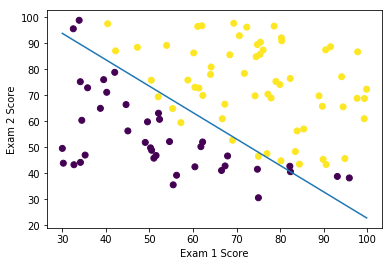

In [29]:
plt.figure()
plt.scatter(df['Exam1'], df['Exam2'], c=df['Admittance'], label=['Not Admitted', 'Admitted'])
plt.xlabel('Exam 1 Score')
plt.ylabel('Exam 2 Score')
plt.plot(x1, x2)

## Regularized Logistic Regression

In [30]:
df = pd.read_csv('./ex2/ex2data2.txt'); df.columns = ['Test1', 'Test2', 'Acceptance']

In [31]:
X = df.drop('Acceptance', axis = 1); y = df['Acceptance'][:, None]

Text(0, 0.5, 'Microchip Test 2 Score')

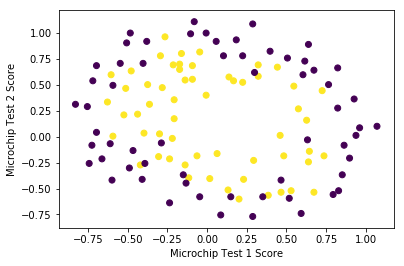

In [32]:
plt.figure()
plt.scatter(df['Test1'], df['Test2'], c=df['Acceptance'])
plt.xlabel('Microchip Test 1 Score')
plt.ylabel('Microchip Test 2 Score')

### Feature Mapping

In [33]:
def map_feature(X, n_degree):
    mapX = pd.DataFrame()
    x1 = X.iloc[:, 0]
    x2 = X.iloc[:, 1]
    for i in range(1, n_degree + 1):
        for j in range(0, i + 1):
            mapX[f'(x_1**{i-j})(x_2) ** {j}'] = (x1 ** (i-j)) * (x2 ** j)
    ones = np.ones((len(x1), 1))
    return np.hstack([ones, mapX])
          
        

In [34]:
Xmap = map_feature(X, 6);

In [35]:
thetas = np.zeros(Xmap.shape[1]); thetas

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [36]:
def cost_function(X, y, theta):
    epsilon = 1e-6
    h_x = h(theta, X)
    m = len(X)
    pos = y * np.log(h_x + epsilon)
    neg = (1-y) * np.log(1-h_x + epsilon)
    error = pos + neg
    cost = np.average(-error)
    return cost

In [37]:
def reg_term(thetas, lambda_param):
    thetas = thetas[1:]
    theta_sum = np.sum(thetas ** 2)
    return lambda_param * theta_sum
  

In [38]:
def reg_cost(thetas, lambda_param):
    m = len(Xmap)
    cost = cost_function(Xmap, y, thetas) + reg_term(thetas, lambda_param) / (2*m)
    return cost

In [39]:
reg_cost(thetas, 1)

0.6931451805619453

In [40]:
def callback_reg_cost(theta):
    return reg_cost(theta, 1)

In [41]:
result = minimize(callback_reg_cost, thetas); result;

Text(0, 0.5, 'Microchip Test 2 Score')

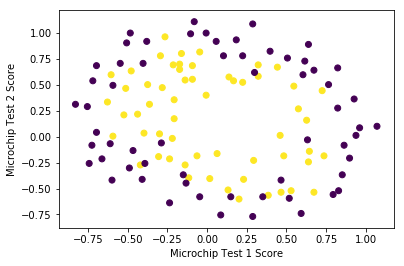

In [42]:
plt.figure()
plt.scatter(df['Test1'], df['Test2'], c=df['Acceptance'])
plt.xlabel('Microchip Test 1 Score')
plt.ylabel('Microchip Test 2 Score')